# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

##Learning Objectives


At the end of the experiment, you will be able to:

* extract features from the images using PCA

* apply SVM on the extracted data and recognize the face

** NOTE: This experiment was seen earlier in the context of PCA. The intent in this case however is to experiment with the SVM parameters and tune your classfier **


In [1]:
#@title Experiment Explanation Video
from IPython.display import HTML

HTML("""<video width="320" height="240" controls>
  <source src="https://cdn.talentsprint.com/aiml/AIML_BATCH_HYD_7/10march/module_2_week_7_experment_3.mp4" type="video/mp4">
</video>
""")

##Dataset 

## Description

The dataset choosen for this experiment is Labeled Faces in the Wild dataset. The dataset is a collection of JPEG images of famous people collected over internet. Each picture is centered on a single face. Each pixel of each channel in RGB is encoded by a float value ranging between
0.0 to 1.0.

To know more about the dataset you can refer below link :


http://vis-www.cs.umass.edu/lfw/

##Domain Information


As it is obviously known by you that every face is different and a face has various features. Some of us have broad forehead, some have narrow, some have fuller lips whereas some have thinner lips etc. Additionally, every feature of the face has different variations. An ideal face recognition system should be able to consider all the variations and the challenges faced to recognize a face accurately.


###Below we have listed a few challenges


**Illumination:** Lighting aspect

**Background:** The placement of the subject also serves as a significant contributor to the limitations.

** Pose:** The movements of head 

** Occlusion:**  beard, moustache, accessories (goggles, caps, mask etc.) also meddle with the evaluation of a face recognition system. Presence of such components make the subject diverse and hence it becomes difficult for the system to operate in a non-simulated environment. 

** Expressions:** A change is expression brings a change into all the aspects of the face.

All these make the probelm very complex.

##AI/ML Technique



### SVM

SVM stands for Support vector machines. It used for both classification and regression tasks. SVM works by searching the linear optimal separating hyperplane (decision boundary). The logic is that decision boundary with large margin is better when handling unseen data compared to decision boundary with small margin. When the data is not
linearly separable, SVM transform original data into a higher dimension using a nonlinear mapping to obtain the separating hyperplane.

To know more about SVM you can refer the below link :

https://www.quantstart.com/articles/Support-Vector-Machines-A-Guide-for-Beginners



## Keywords

* grid_search

* SVM

* cross_validation

* PCA

* Face recognization

* Kernels

#### Expected time to complete the experiment is : 65min

### Setup Steps

In [0]:
#@title Please enter your registration id to start: (e.g. P181900101) { run: "auto", display-mode: "form" }
Id = "P181902118" #@param {type:"string"}


In [0]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "8860303743" #@param {type:"string"}


In [5]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook="BLR_M2W3E25_SVM_Facerecognition" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")  
    print ("sx pip3 install seaborn")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      print("Your submission is successful.")
      print("Ref Id:", submission_id)
      print("Date of submission: ", r["date"])
      print("Time of submission: ", r["time"])
      print("View your submissions: https://iiith-aiml.talentsprint.com/notebook_submissions")
      print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
      return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if Additional: return Additional      
    else: raise NameError('')
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None

def getAnswer():
  try:
    return Answer
  except NameError:
    print ("Please answer Question")
    return None

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
    from IPython.display import HTML
    HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id))
  
else:
  print ("Please complete Id and Password cells before running setup")



sx pip3 install seaborn


Setup completed successfully


### Importing the required packages

In [0]:
from sklearn.datasets import fetch_lfw_people
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import seaborn as sns; sns.set()


import warnings
warnings.simplefilter("ignore")

### Loading the dataset from sklearn datasets package

In [8]:
faces = fetch_lfw_people(min_faces_per_person=60)

In [9]:
# Checking for the target names
print(faces.target_names)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']


In [10]:
# Checking for the shape of images
print(faces.images.shape)

(1348, 62, 47)


To get sense of the data, Let us visualize the faces

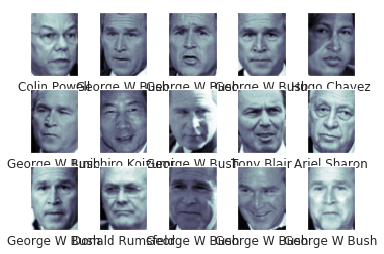

In [11]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone') 
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

Each image contains [62×47] or nearly 3,000 pixels. We could proceed by simply using each pixel value as a feature, but often it is more effective to use some sort of preprocessor to extract more meaningful features; here we will use a principal component analysis to extract 150 fundamental components to feed into our support vector machine classifier. We can do this most straightforwardly by packaging the preprocessor and the classifier into a single pipeline:

In [0]:
pca = PCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

For testing our classifier output, we will split the data into a training and testing set:

In [0]:
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

In [14]:
Xtest.shape

(337, 2914)

Finally, we can use a grid search cross-validation to explore combinations of parameters. Here we will adjust C (which controls the margin hardness) and gamma (which controls the size of the radial basis function kernel), and determine the best model:

In [15]:

param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

CPU times: user 42.4 s, sys: 12.7 s, total: 55.1 s
Wall time: 31.6 s
{'svc__C': 10, 'svc__gamma': 0.001}


The optimal values fall toward the middle of our grid; if they fell at the edges, we would want to expand the grid to make sure we have found the true optimum. 

Now with this cross-validated model, we can predict the labels for the test data, which the model has not yet seen:

In [0]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

Let's take a look at a few of the test images along with their predicted values:

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

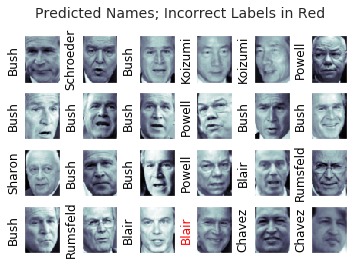

In [17]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

Out of this small sample, our optimal estimator mislabeled only a single face (Bush’s face in the bottom row was mislabeled as Blair). We can get a better sense of our estimator's performance using the classification report, which lists recovery statistics label by label:

In [18]:

print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

        micro avg       0.85      0.85      0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



We might also display the confusion matrix between these classes:

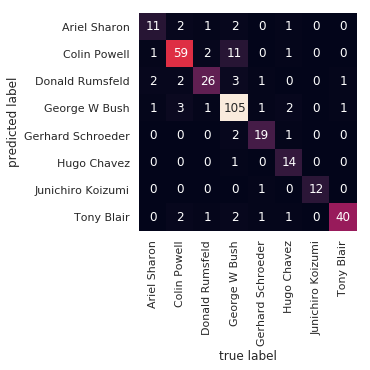

In [19]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

For a real-world facial recognition task, in which the photos do not come pre-cropped into nice grids, the only difference in the facial classification scheme is the feature selection: you would need to use a more sophisticated algorithm to find the faces, and extract features that are independent of the pixellation.

#### Acknowledgement :  Python Data Science Handbook by Jake VanderPlas

### Please answer the questions below to complete the experiment:




In [0]:
#@title The "C" parameter, controls the size of the radial basis function kernel?{ run: "auto", form-width: "500px", display-mode: "form" }
Answer = "FALSE" #@param ["TRUE","FALSE"]


In [0]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging me" #@param ["Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging me", "Was Tough, but I did it", "Too Difficult for me"]


In [0]:
#@title If it was very easy, what more you would have liked to have been added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "test" #@param {type:"string"}

In [0]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["Yes", "No"]

In [25]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id =return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 4775
Date of submission:  08 May 2019
Time of submission:  22:33:11
View your submissions: https://iiith-aiml.talentsprint.com/notebook_submissions
For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.
